In [1]:
import PMM

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal

def get_near_psd(A):
    C = (A + A.T)/2
    eigval, eigvec = np.linalg.eig(C)
    eigval[eigval < 0] = 0

    return eigvec.dot(np.diag(eigval)).dot(eigvec.T)

def real_u(x):
    return  (1/ (2* np.pi**2))*((np.sin(np.pi * x))**2)

def gauss_kernel(x1, x2, L=0.25):
    return np.exp(- (x1-x2)**2 / (2* L**2))

def gauss_kernel_derix(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (-(x1 - x2) / L**2)

def gauss_kernel_deriy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * ((x1 - x2) / L**2)

def gauss_kernel_derixy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * (-(x1-x2)**2  + L**2)

def gauss_kernel_derixx(x1, x2, L=0.25): #This is A operator 
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * ((x1-x2)**2  - L**2)

def gauss_kernel_deriyy(x1, x2, L=0.25): #This is A_hat operator 
    return gauss_kernel_derixx(x1, x2, L) 

#AA_hat operator
def gauss_kernel_derixxyy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**8) *(3* (L**4) - 6* (L**2)*((x1-x2)**2) + (x1-x2)**4)

g1 =  lambda x: np.cos(2*np.pi*x)
b1 = lambda x: 0

d1, d2 = 0, 1
D = [0, 1]

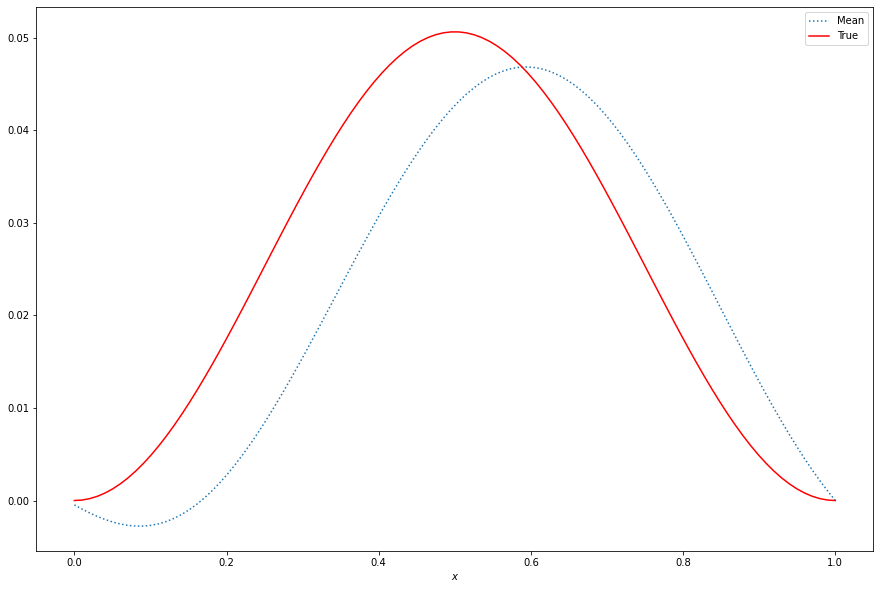

In [2]:
poisson = PMM.PMM(g1, b1, gauss_kernel_derixx, gauss_kernel, gauss_kernel_deriyy, gauss_kernel, 0, 1, D, gauss_kernel, gauss_kernel_derixxyy, gauss_kernel_derixx, gauss_kernel_deriyy, gauss_kernel)

N = 100
X = [(1/N)*i for i in range(N)]
mean1, var1 = poisson.posterior(X, 10, 2)
plt.figure(figsize = (15,10))
# compare the mean of multivariate normal with true solution 
plt.plot(np.linspace(0, 1, N),  mean1, linestyle = 'dotted')
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r')
plt.xlabel(r'$x$')
plt.legend(['Mean','True'])
plt.show()

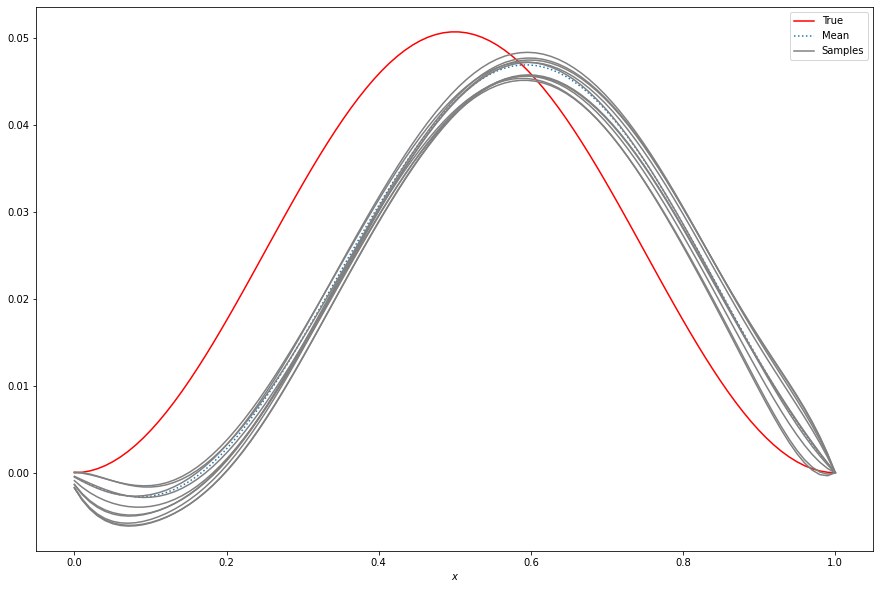

In [3]:
sample = np.random.multivariate_normal(mean1, var1, size=10)
plt.figure(figsize = (15,10))
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r')
plt.plot(np.linspace(0, 1, N),  mean1, linestyle = 'dotted')
plt.plot(np.linspace(0, 1, N),  sample.T, color = 'grey')
plt.xlabel(r'$x$')
plt.legend(['True', 'Mean', 'Samples'])
plt.show()

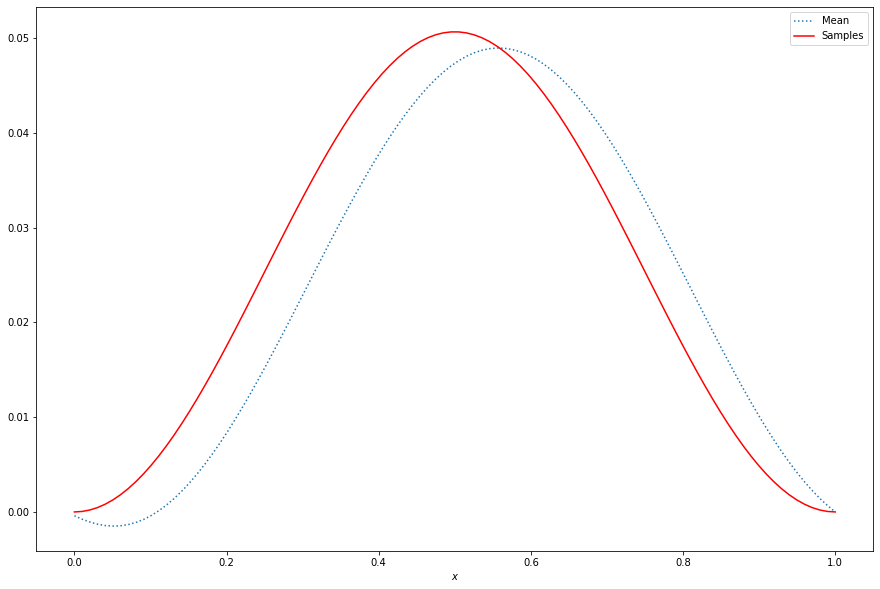

In [4]:
mean2, var2 = poisson.posterior(X, 16, 2)
plt.figure(figsize = (15,10))
plt.plot(np.linspace(0, 1,  N),  mean2,  linestyle = 'dotted')
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r')
plt.xlabel(r'$x$')
plt.legend(['Mean', 'Samples'])
plt.show()

<ipython-input-5-61e8e71a806c>:1: RuntimeWarning: covariance is not positive-semidefinite.
  sample = np.random.multivariate_normal(mean2, var2, size=10)


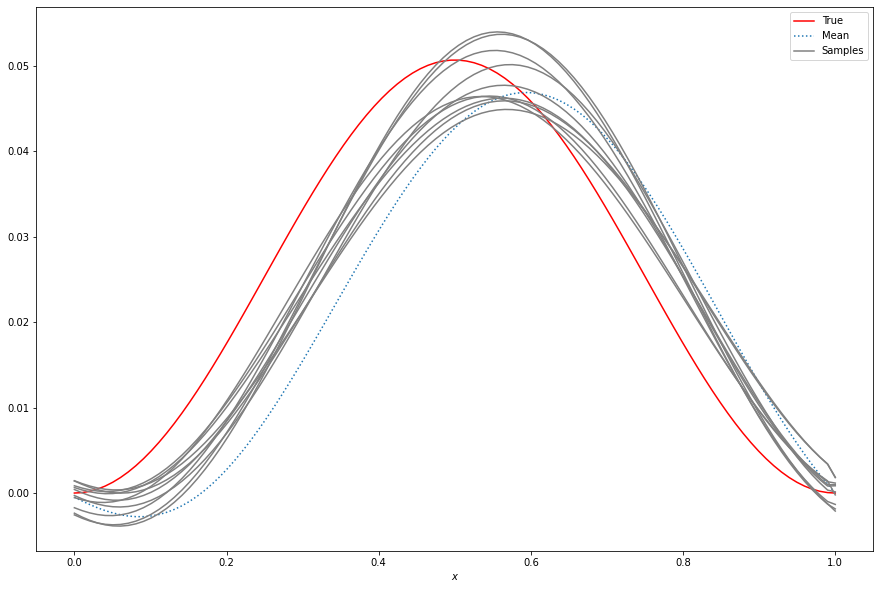

In [5]:
sample = np.random.multivariate_normal(mean2, var2, size=10)
plt.figure(figsize = (15,10))
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r')
plt.plot(np.linspace(0, 1, N),  mean1, linestyle = 'dotted')
plt.plot(np.linspace(0, 1, N),  sample.T, color = 'grey')
plt.xlabel(r'$x$')
plt.legend(['True', 'Mean', 'Samples'])
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


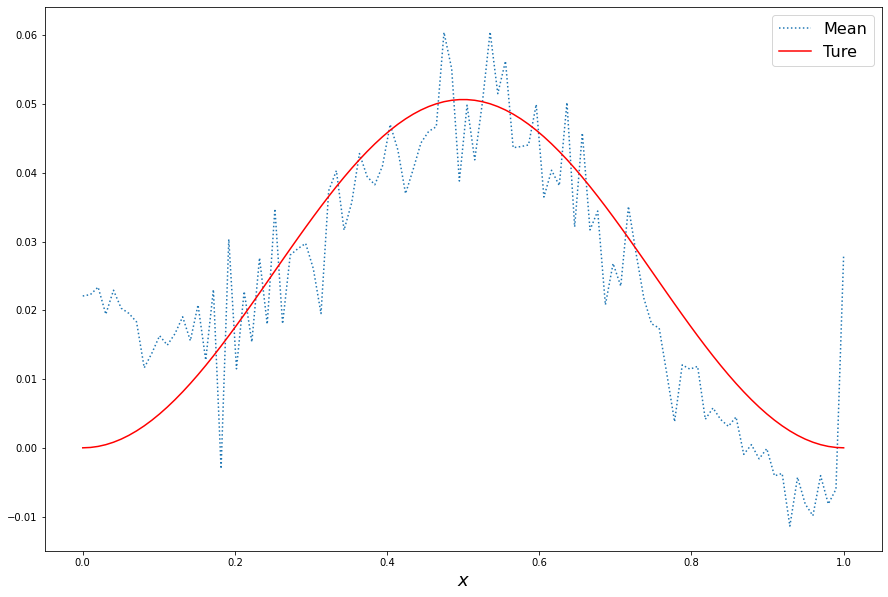

In [8]:
mean3, var3 = poisson.posterior(X, 25, 2)
plt.figure(figsize = (15,10))
plt.plot(np.linspace(0, 1,  N),  mean3,  linestyle = 'dotted')
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r')
plt.xlabel(r'$x$', fontsize = 18)
plt.legend(['Mean', 'Ture'], fontsize = 16, loc = 'upper right')
plt.savefig('overfitting.eps', format='eps')

In [ ]:
# PMM with Gaussian kernel and different selection of L

from cProfile import label


L = [0.25+ 0.025*i for i in range(0, 5)]

N = 100
X = [(1/N)*i for i in range(N)]
plt.figure(figsize = (15,10))
plt.plot(np.linspace(0, 1, N), real_u(np.linspace(0, 1, N)), color = 'r', label='True')
for l in L:

    def gauss_kernel(x1, x2, L=l):
        return np.exp(- (x1-x2)**2 / (2* L**2))

    def gauss_kernel_derix(x1, x2, L=l):
        return np.exp(-(x1-x2)**2 / (2* L**2)) * (-(x1 - x2) / L**2)

    def gauss_kernel_deriy(x1, x2, L=l):
        return np.exp(-(x1-x2)**2 / (2* L**2)) * ((x1 - x2) / L**2)

    def gauss_kernel_derixy(x1, x2, L=l):
        return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * (-(x1-x2)**2  + L**2)

    def gauss_kernel_derixx(x1, x2, L=l): #This is A operator 
        return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * ((x1-x2)**2  - L**2)

    def gauss_kernel_deriyy(x1, x2, L=l): #This is A_hat operator 
        return gauss_kernel_derixx(x1, x2, L) 

    new_poisson = pmm.PMM(g1, b1, gauss_kernel_derixx, gauss_kernel, gauss_kernel_deriyy, gauss_kernel, 0, 1, D, gauss_kernel, gauss_kernel_derixxyy, gauss_kernel_derixx, gauss_kernel_deriyy, gauss_kernel)
    new_mean1, new_var1 = new_poisson.posterior(X, 13, 2)
    plt.plot(np.linspace(0, 1, N),  new_mean1, linestyle = 'dotted', label=f'PMM L={l}')

plt.xlabel(r'$x$')
plt.legend(loc = 'upper right')

plt.savefig('PMM_Gauss_choiceL.eps', format='eps')


In [ ]:
### PMM with Matern kernel 
def matern_kernel(x1, x2, sigma=0.01, l = 0.25):
    r = x1 - x2
    return sigma**2 * (1 + r*np.sqrt(5)/l + 5 * r**2 / (3*l**2)) * np.exp(- r*np.sqrt(5) / l)

def matern_kernel_derix(x1, x2, sigma=0.01, l = 0.25):
    r = x1 - x2
    return - (5*sigma**2 * r *np.exp(- r*np.sqrt(5)/l)*(l + np.sqrt(5)*r)) / (3* l**3)

def matern_kernel_deriy(x1, x2, sigma=0.01, l=0.25):
    r = x1 - x2
    return (5*sigma**2 * r *np.exp(- r*np.sqrt(5)/l)*(l + np.sqrt(5)*r)) / (3* l**3)

def matern_kernel_derixx(x1, x2, sigma=0.01, l=0.25):
    r = x1 - x2
    return - (5* sigma**2 * np.exp(- r*np.sqrt(5)/l) * (l**2 + np.sqrt(5)*l*r - 5*r**2)) / (3* l**4)

def matern_kernel_deriyy(x1, x2, sigma=0.01, l=0.25):
    r = x1 - x2 
    return - (5* sigma**2 * np.exp(- r*np.sqrt(5)/l) * (l**2 + np.sqrt(5)*l*r - 5*r**2)) / (3* l**4)

def matern_kernel_derixxyy(x1, x2, sigma=0.01, l=0.25):
    r = x1 - x2
    return 25 * sigma**2 * np.exp(- r*np.sqrt(5)/l) * (3* l**2 - 5*np.sqrt(5) * r + 5* r**2) / (3* l**6)
